In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
from requests_oauthlib import OAuth1

In [2]:
auth_params = {
    'app_key':'hz76GGcveHsN26QvAcTHhDVnn',
    'app_secret':'hrBmAzughGzIV7oMvYnMb3JqXBEa4nXnrhzNSDQ7pTPnjaxi4n',
    'oauth_token':'2547850260-3sVyHvzTYVTME2OEKhr9XEaZJ60eVvmSTMDwFDr',
    'oauth_token_secret':'CRJmrH50FcbMAvDrguTTmgrQwVp81avbLJKCXzulV1d2B'
}

# Creating an OAuth Client connection
auth = OAuth1 (
    auth_params['app_key'],
    auth_params['app_secret'],
    auth_params['oauth_token'],
    auth_params['oauth_token_secret']
)

# url according to twitter API
url_rest = "https://api.twitter.com/1.1/search/tweets.json"

In [22]:
# getting rid of retweets in the extraction results and filtering all replies to the tweet often uncessary for the analysis
q = '%40Flipkart -filter:retweets -filter:replies' # Twitter handle of Flipkart

# count : no of tweets to be retrieved per one call and parameters according to twitter API
params = {'q': q, 'count': 1000, 'lang': 'en',  'result_type': 'recent'}

results = requests.get(url_rest, params=params, auth=auth)

tweets = results.json()

messages = [BeautifulSoup(tweet['text'], 'html5lib').get_text() for tweet in tweets['statuses']]

In [23]:
messages

["Why my return is rejected?? Even Allocated jeevas engineer came for verification but he did not know the mobile's m… https://t.co/5I4LfnFAHh",
 'I ♥ this product on Flipkart! Aamivi Twin Heart Shape 3D LED Multi Colour Night Lamp https://t.co/WcBXLm3JaF #buyonflipkart via @Flipkart',
 'Ready, set, GO!! #RedmiGo, the #AndroidGo hero comes with:\n\n- 8MP rear camera, 5MP front camera\n- 3000mAh long-last… https://t.co/E3Cd2bcD2G',
 'Perfect the limits with Note lip pencil for a clean look. ✨\n.\n.\nShop at : https://t.co/be7RCeviD8\nAlso available at… https://t.co/TYYAPg4BfQ',
 'Hey @flipkartsupport  ! I need urgent support for my order with order ID 0D117825914110857000 on my provided number… https://t.co/ZciQ2zsCJK',
 'Time to revamp your wardrobe with #ICICIBank’s #TrendyWednesdays offer. Simply, shop on @Flipkart across fashion ca… https://t.co/Gcnj6Izzd0',
 "Why @amazonIN and @Flipkart are shipping using plastic packages? Amazon can atleast ship 'Prime Orders' using cardb… https:/

In [34]:
# getting rid of retweets in the extraction results and filtering all replies to the tweet often uncessary for the analysis
p = 'Snapdeal+headphones'# -filter:retweets -filter:replies'

# count : no of tweets to be retrieved per one call and parameters according to twitter API
params = {'q': p, 'count': 1000, 'lang': 'en',  'result_type': 'recent'}

results = requests.get(url_rest, params=params, auth=auth)

tweets = results.json()

messages = [BeautifulSoup(tweet['text'], 'html5lib').get_text() for tweet in tweets['statuses']]

In [35]:
messages

["@snapdeal is scam. I have ordered headphones. But not received. I raised complain also no response. It's scam. @Snapdeal_Help"]

In [5]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import random
import glob
from textblob import TextBlob
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [24]:
tweets_df = pd.DataFrame({'tweets' : messages})
tweets_df.head(10)

,tweets
0,Why my return is rejected?? Even Allocated jee...
1,I ♥ this product on Flipkart! Aamivi Twin Hear...
2,"Ready, set, GO!! #RedmiGo, the #AndroidGo hero..."
3,Perfect the limits with Note lip pencil for a ...
4,Hey @flipkartsupport ! I need urgent support ...
5,Time to revamp your wardrobe with #ICICIBank’s...
6,Why @amazonIN and @Flipkart are shipping using...
7,My product was missing.. And when I complained...
8,Flipkart expands furniture section; aims to ca...
9,Does anyone know if @Flipkart and @myntra have...


In [25]:
tweets_df.shape

(100, 1)

In [8]:
stop_words = list(set(stopwords.words('english')))

def cleanse(input_text):
    keep_alpha = re.sub("[^a-zA-Z]"," ",input_text)
    remove_extra_spaces = re.sub("[\s]+"," ",keep_alpha)
    convert_case = remove_extra_spaces.lower()
    stop_words_removal = [word for word in convert_case.split()
                          if word not in stop_words]
    remove_smaller_words = [word for word in stop_words_removal
                          if len(word) >=3]
    clean_tokens = [word for word in remove_smaller_words
                   if 'http' not in word and
                   '@' not in word and
                   '<' not in word and
                   'RT' not in word]
    return " ".join(clean_tokens)

lemmatizer = WordNetLemmatizer()

def lemmatize(input_text):
    lemmas=[]
    tokens = input_text.split()
    for token in tokens:
        tag = nltk.pos_tag([token])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        if tag in tag_dict.keys():
            pos = tag_dict[tag]
            lemma = lemmatizer.lemmatize(token,pos)
            lemmas.append(lemma)
        else:
            lemmas.append(token)
    return " ".join(lemmas)

In [26]:
tweets_df['clean_tweets'] = tweets_df['tweets'].apply(cleanse)
tweets_df['clean_tweets'] = tweets_df['clean_tweets'].apply(lemmatize)
tweets_df

,tweets,clean_tweets
0,Why my return is rejected?? Even Allocated jee...,return reject even allocate jeevas engineer co...
1,I ♥ this product on Flipkart! Aamivi Twin Hear...,product flipkart aamivi twin heart shape lead ...
2,"Ready, set, GO!! #RedmiGo, the #AndroidGo hero...",ready set redmigo androidgo hero come rear cam...
3,Perfect the limits with Note lip pencil for a ...,perfect limit note lip pencil clean look shop ...
4,Hey @flipkartsupport ! I need urgent support ...,hey flipkartsupport need urgent support order ...
...,...,...
95,#UpForXtra craziness? Have a look at all that’...,upforxtra craziness look pop honor challenge s...
96,Why are you taking that much time? First you s...,take much time first say february february las...
97,"This #realmeDays Sale, get a flat ₹2,000 disco...",realmedays sale get flat discount favourite re...
98,Thank you for Ruining my surprise anniversary ...,thank ruin surprise anniversary gift girlfrien...


In [10]:
def get_sentiment(input_string):
    blob = TextBlob(input_string)
    sentiment = blob.sentiment.polarity
    return sentiment

In [27]:
tweets_df['sentiment'] = tweets_df['clean_tweets'].apply(get_sentiment)
tweets_df

,tweets,clean_tweets,sentiment
0,Why my return is rejected?? Even Allocated jee...,return reject even allocate jeevas engineer co...,0.000000
1,I ♥ this product on Flipkart! Aamivi Twin Hear...,product flipkart aamivi twin heart shape lead ...,0.000000
2,"Ready, set, GO!! #RedmiGo, the #AndroidGo hero...",ready set redmigo androidgo hero come rear cam...,0.050000
3,Perfect the limits with Note lip pencil for a ...,perfect limit note lip pencil clean look shop ...,0.588889
4,Hey @flipkartsupport ! I need urgent support ...,hey flipkartsupport need urgent support order ...,0.000000
...,...,...,...
95,#UpForXtra craziness? Have a look at all that’...,upforxtra craziness look pop honor challenge s...,0.000000
96,Why are you taking that much time? First you s...,take much time first say february february las...,0.150000
97,"This #realmeDays Sale, get a flat ₹2,000 disco...",realmedays sale get flat discount favourite re...,0.487500
98,Thank you for Ruining my surprise anniversary ...,thank ruin surprise anniversary gift girlfrien...,0.000000


In [28]:
negative_counts = tweets_df[tweets_df['sentiment']<0].count()[0]
neutral_counts = tweets_df[tweets_df['sentiment']==0].count()[0]
positive_counts = tweets_df[tweets_df['sentiment']>0].count()[0]

print(negative_counts)
print(neutral_counts)
print(positive_counts)

17
43
40


In [29]:
y_pos = [0,1,2]
counts = [positive_counts,neutral_counts,negative_counts]

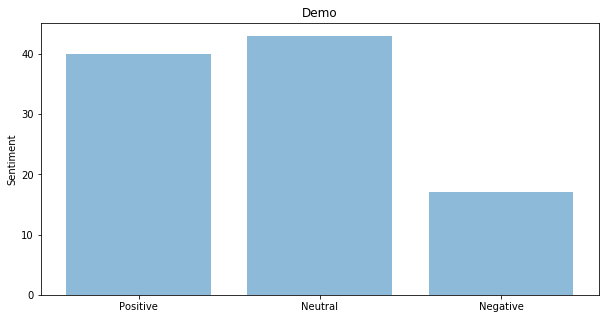

In [30]:
plt.figure(figsize=(10,5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos,['Positive','Neutral','Negative'])
plt.ylabel('Sentiment')
plt.title('Demo')
plt.show()

In [31]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),
                             max_features=100,
                             min_df=0.01,
                             max_df=0.80)

vectorizer.fit_transform(tweets_df['clean_tweets'])

#top 20 words in TF-IDF (word, TF-IDF value, index)
top_n= 20
indices = vectorizer.idf_.argsort()[::-1] # sort by TF-IDF
features = vectorizer.get_feature_names() # word list
top_features = [(features[i], vectorizer.idf_[i],i)
               for i in indices[:top_n]]

d = {}
for i in top_features:
    d[i[0]] = i[1]
    
w = WordCloud(background_color='white',
             max_words=200,
             max_font_size=200,
             height=2000,
             width=2000,
             colormap='rainbow').fit_words(d)

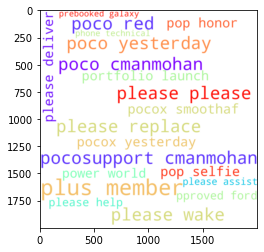

In [32]:
w.to_file('beautifulSoup_demo2.png')
plt.imshow(w, interpolation='bilinear')

<img src='beautifulSoup_demo2.png'>